# CH2 非线性方程的求解

> 236527 邵毅
> 
> 题目选择 Steffensen 加速的数值研究

## 题目

---

![题目](./QQ图片20231103202921.jpg)

## 导入库文件
---

此处导入本次实验中所需的所有库

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

## 通用算法
---


由于本次实验中需要多次用到不动点迭代法和 Steffensen 加速法，因此此处定义这两个函数的通用算法。

### 不动点迭代法

此处为不动点迭代法的通用实现。其中，`f` 为迭代函数，`x0` 为初始值，`error` 为误差限，`max_iter` 为最大迭代次数。

In [3]:
def fixed_point_iteration(f, x0, error=1e-12, max_iterations = 100):
    '''
    Fixed point iteration for finding a fixed point of a function.
    :param f: function
    :param x0: initial guess
    :param error: error tolerance
    :param max_iterations: maximum number of iterations
    '''
    for i in range(max_iterations):
        x1 = f(x0)
        if abs(x1 - x0) < error:
            return i+1, x1
        else:
            x0 = x1

    raise ValueError(f"Method failed after {max_iterations} iterations")

### Steffensen 加速法

Steffesen 加速法的迭代公式为：

$$
x_{k+1} = x_k - \frac{[\phi(x_k)-x_k]^2}{\phi[\phi(x_k)] - 2\phi(x_k) + x_k}
$$

Steffensen 加速法的通用实现如下所示。其中，`f` 为迭代函数，`x0` 为初始值，`error` 为误差限，`max_iter` 为最大迭代次数。

In [4]:
def steffensen(f, x0, error=1e-12, max_iterations = 100):
    '''
    Steffensen's method for finding a fixed point of a function.
    :param f: function
    :param x0: initial guess
    :param error: error tolerance
    :param max_iterations: maximum number of iterations
    '''
    for i in range(max_iterations):
        y1 = f(x0)
        y2 = f(y1)
        try:
            x1 = x0 - (y1 - x0) ** 2 / (y2 - 2 * y1 + x0)
        except ZeroDivisionError:
            print("Division by zero!")
            return i+1, x0
        if abs(x1 - x0) < error:
            return i+1, x1
        else:
            x0 = x1

    raise ValueError(f"Method failed after {max_iterations} iterations")

## 问题 1
---


### 问题描述

求解方程 $x^3 - x - 1 = 0$，为该方程设计至少两种迭代格式，要求线性收敛格式和发散格式至少一个，并分别用不动点迭代法和 Steffensen 加速法求解。

### 问题分析

首先，通过分析，该方程的解在 $[1, 2]$ 中。为该方程设计以下三种迭代格式：

$$
x_{k+1} = x_k^3 - 1 \tag{1}
$$

$$
x_{k+1} = \sqrt[3]{x_k + 1} \tag{2}
$$

$$
x_{k+1} = \sqrt{1+\frac{1}{x_{k+1}}} \tag{3}
$$

易证得，式 (1) 为发散格式，式 (2) 和式 (3) 为线性收敛格式。将其用函数实现，作为不动点迭代法和 Steffensen 加速法的迭代函数。代码如下：


In [5]:
def phi1(x):
    return x ** 3 - 1


def phi2(x):
    return (x + 1) ** (1 / 3)


def phi3(x):
    return (1 + 1 / x) ** (1 / 2)

### 问题求解

#### 不动点迭代法

首先，使用不动点迭代法求解。代码如下：

In [6]:
x0_list = [1, 2]
phi_list = [phi2, phi3]  # phi1 is not a contraction mapping

print("Fixed point iteration:")
print()
for phi in phi_list:
    for x0 in x0_list:
        print(f"phi = {phi.__name__}, x0 = {x0}")
        i, x = fixed_point_iteration(phi, x0)
        print(f"Number of iterations: {i}, x = {x}")
        print()

Fixed point iteration:

phi = phi2, x0 = 1
Number of iterations: 17, x = 1.3247179572445578

phi = phi2, x0 = 2
Number of iterations: 18, x = 1.324717957244809

phi = phi3, x0 = 1
Number of iterations: 19, x = 1.3247179572448287

phi = phi3, x0 = 2
Number of iterations: 19, x = 1.3247179572446433



#### Steffensen 加速法

然后，使用 Steffensen 加速法求解。代码如下：

In [7]:
x0_list = [1, 2]
phi_list = [phi1, phi2, phi3]  # phi1 is not a contraction mapping

print("Steffensen's method:")
print()
for phi in phi_list:
    for x0 in x0_list:
        print(f"phi = {phi.__name__}, x0 = {x0}")
        i, x = steffensen(phi, x0)
        print(f"Number of iterations: {i}, x = {x}")
        print()

Steffensen's method:

phi = phi1, x0 = 1
Division by zero!
Number of iterations: 1, x = 1

phi = phi1, x0 = 2
Number of iterations: 13, x = 1.324717957244746

phi = phi2, x0 = 1
Division by zero!
Number of iterations: 4, x = 1.324717957244746

phi = phi2, x0 = 2
Division by zero!
Number of iterations: 4, x = 1.324717957244746

phi = phi3, x0 = 1
Number of iterations: 4, x = 1.324717957244746

phi = phi3, x0 = 2
Number of iterations: 4, x = 1.324717957244746



### 结果分析

#### 不动点迭代法

两种线性收敛的迭代格式都在 20 次迭代内收敛到了 1.324717957245。由于迭代格式 $(1)$ 不收敛，不动点迭代法无法求解。

#### Steffensen 加速法

Steffensen 加速法在采用迭代格式 $(2)$ 和迭代格式 $(3)$ 时，在 5 次迭代内收敛到了 1.324717957245。

对于发散的迭代格式 $(1)$，在初始值为 2 时，经过 13 次迭代，也可以求得准确的结果。收敛速度与不动点迭代法相近。

可以看出，Steffensen 加速法的收敛速度要比不动点迭代法快得多，且对于迭代格式和初始值的要求更低。


## 问题 2
---

### 问题描述

1. 给定方程 $3x^2-e^x=0$，分析其有根区间，取迭代格式 $x_{k+1} = \ln{x_k^2} + \ln3$，选取初值为 $x_0 = 3.5, 1, -0.5$ ，对比不动点迭代法和 Steffensen 加速法的结果。

2. 设计更多的格式，选取更多的初值，重复前面的操作

### 问题分析

首先，令 $f(x)=3x^2-e^x$。利用图解法，依次分析 $f''(x)$ 、 $f'(x)$ 和 $f(x)$ 的图像，可得 $f(x)=0$ 在 $[-1, 0]$，$[0, 1]$， $[3, 4]$ 内各有一唯一解。

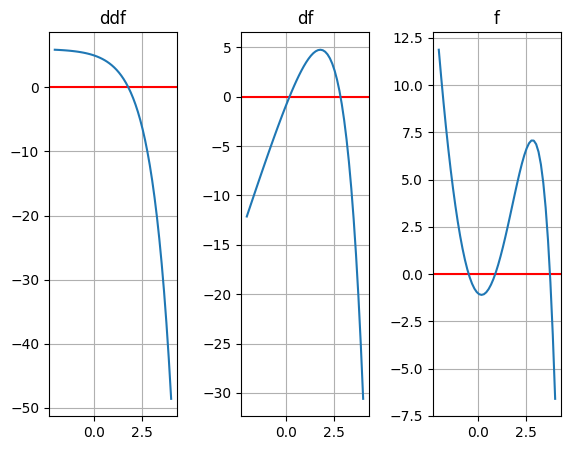

In [8]:
def f(x):
    return 3 * x ** 2 - np.exp(x)


def df(x):
    return 6 * x - np.exp(x)


def ddf(x):
    return 6 - np.exp(x)

# 画图
f_list = [ddf, df, f]
for i in range(3):
    x = np.linspace(start=-2, stop=4)
    y = f_list[i](x)
    plt.subplot(1, 3, i+1)
    # 标红 y=0 的线
    plt.axhline(y=0, color='r', linestyle='-')
    plt.plot(x, y)
    plt.grid()
    # 使得长宽一致，图像更加美观
    plt.gca().set_aspect('auto', adjustable='datalim')
    plt.title(f_list[i].__name__)
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

### 问题 2.1 求解

类似于问题 1，首先，使用不动点迭代法和 Steffensen 加速法求解。代码如下：

In [9]:
def phi4(x):
    return m.log(x ** 2) + m.log(3)

In [10]:
x0_list = [3.5, 1, -0.5]
phi_list = [phi4]

print("Fixed point iteration:")
print()
for phi in phi_list:
    for x0 in x0_list:
        print(f"phi = {phi.__name__}, x0 = {x0}")
        i, x = fixed_point_iteration(phi, x0)
        print(f"Number of iterations: {i}, x = {x}")
        print()
print("----------------------------------------")
print("Steffensen's method:")
print()
for phi in phi_list:
    for x0 in x0_list:
        print(f"phi = {phi.__name__}, x0 = {x0}")
        i, x = steffensen(phi, x0)
        print(f"Number of iterations: {i}, x = {x}")
        print()

Fixed point iteration:

phi = phi4, x0 = 3.5
Number of iterations: 42, x = 3.7330790286317805

phi = phi4, x0 = 1
Number of iterations: 51, x = 3.7330790286321687

phi = phi4, x0 = -0.5
Number of iterations: 50, x = 3.7330790286318694

----------------------------------------
Steffensen's method:

phi = phi4, x0 = 3.5
Number of iterations: 4, x = 3.733079028632815

phi = phi4, x0 = 1
Division by zero!
Number of iterations: 6, x = 0.910007572488709

phi = phi4, x0 = -0.5
Number of iterations: 5, x = -0.4589622675369485



### 问题 2.1 结果分析

#### 不动点迭代法

无论使用哪个初始值，不动点迭代法都在 50 次左右的迭代收敛到了 3.733079028632。这是由于该格式仅在 $[3,4]$ 上收敛，而在 $[-1, 0]$ 和 $[0, 1]$ 上发散。、

#### Steffensen 加速法

Steffensen 加速法都在 10 次迭代以内，收敛到了对应区间内的解。可见相较于不动点迭代法， Steffensen 加速法的收敛速度要比不动点迭代法快得多，且对于迭代格式和初始值的要求更低。

### 问题 2.2 求解

问题 2.1 提供为 $f(x)=0$ 提供了一种迭代格式
$$
x_{k+1} = \ln{x_k^2} + \ln3 \tag{4}
$$
为该方程设计以下两种额外的迭代格式：
$$
x_{k+1} = \sqrt{\frac{e^{x_k}}{3}} \tag{5}
$$
$$
x_{k+1} = \frac{e^{x_k}}{3x_k} \tag{6}
$$
选取 $x_0 = -1, -0.5, -0.1, 0.1, 0.5, 1, 2, 3.5$ 作为初始值，分别对问题 2.1 中提供的迭代格式和额外的迭代格式进行求解。

In [11]:
def phi5(x):
    return (m.exp(x) / 3) ** (1 / 2)


def phi6(x):
    if x == 0:
        print("Division by zero!")
        return 0
    return m.exp(x) / (3 * x)

In [18]:

x0_list = [-1, -0.5, -0.1, 0.1, 0.5, 1, 2, 3.5]
phi_list = [phi4, phi5, phi6]

print("Fixed point iteration:")
print()
for phi in phi_list:
    print(f"phi = {phi.__name__}")
    for x0 in x0_list:
        i, x = fixed_point_iteration(phi, x0)
        print(f"x0 = {x0:4}, number of iterations: {i}, x = {x}")
    print()
print("----------------------------------------")
print("Steffensen's method:")
print()
for phi in phi_list:
    print(f"phi = {phi.__name__}")
    for x0 in x0_list:
        i, x = steffensen(phi, x0)
        print(f"x0 = {x0:4}, number of iterations: {i}, x = {x}")
    print()


Fixed point iteration:

phi = phi4
x0 =   -1, number of iterations: 51, x = 3.7330790286321687
x0 = -0.5, number of iterations: 50, x = 3.7330790286318694
x0 = -0.1, number of iterations: 43, x = 3.7330790286318116
x0 =  0.1, number of iterations: 43, x = 3.7330790286318116
x0 =  0.5, number of iterations: 50, x = 3.7330790286318694
x0 =    1, number of iterations: 51, x = 3.7330790286321687
x0 =    2, number of iterations: 47, x = 3.7330790286321323
x0 =  3.5, number of iterations: 42, x = 3.7330790286317805

phi = phi5
x0 =   -1, number of iterations: 36, x = 0.9100075724882343
x0 = -0.5, number of iterations: 36, x = 0.9100075724883031
x0 = -0.1, number of iterations: 35, x = 0.9100075724879813
x0 =  0.1, number of iterations: 35, x = 0.9100075724880831
x0 =  0.5, number of iterations: 34, x = 0.9100075724878983
x0 =    1, number of iterations: 33, x = 0.9100075724891954
x0 =    2, number of iterations: 37, x = 0.9100075724891628
x0 =  3.5, number of iterations: 41, x = 0.9100075724

### 问题 2.2 结果分析

#### 不动点迭代法

对于迭代格式 $(4)$ ，算法对所有初始值，均在 50 次左右的迭代收敛到了 3.733079028632。这是由于该格式仅在 $[3,4]$ 上收敛，而在 $[-1, 0]$ 和 $[0, 1]$ 上发散。

对于迭代格式 $(5)$ ，算法在 30-40 次迭代后，收敛到了 0.910007572488。

对于迭代格式 $(6)$ ，当初始值为 -1、-0.5、-0.1 时，无法得出结果，对于其他的初始值，算法在 15-20 次迭代后，收敛到了 0.910007572488。

#### Steffensen 加速法

使用 Steffensen 加速法时，除了迭代格式 $(5)$ 没有得到方程的全部三个解，其余的迭代格式都在 10 次左右的迭代后，得到了方程的全部三个解。但对于迭代格式 $(4)$ ，初始值选取 -1、-0.1 等值时，未能收敛到对应区间中的解。

## 问题 3
---

通过上述的两个实验，可以看出：

1. 相较于不动点迭代法，Steffensen 加速法收敛速度更快。
  
2. 相较于不动点迭代法，Steffensen 加速法更容易在较大范围上收敛，对 $\phi(x)$ 的要求比不动点迭代法低。例如实验 2，不动点迭代法对迭代格式的要求较高，在不同区间上需要使用不同迭代格式，才可以求出方程的三个解；而使用 Steffensen 加速法，三种迭代格式中有两种可以直接求得方程的三个解。
  
3. Steffensen 对初值的选取有一定的要求，如果选取的值不合适，可能无法获取方程所有的解。